# Stock Market Predicion


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('ADANIPORTS.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
df.shape

(3322, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [6]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [7]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

Text(0, 0.5, 'Count')

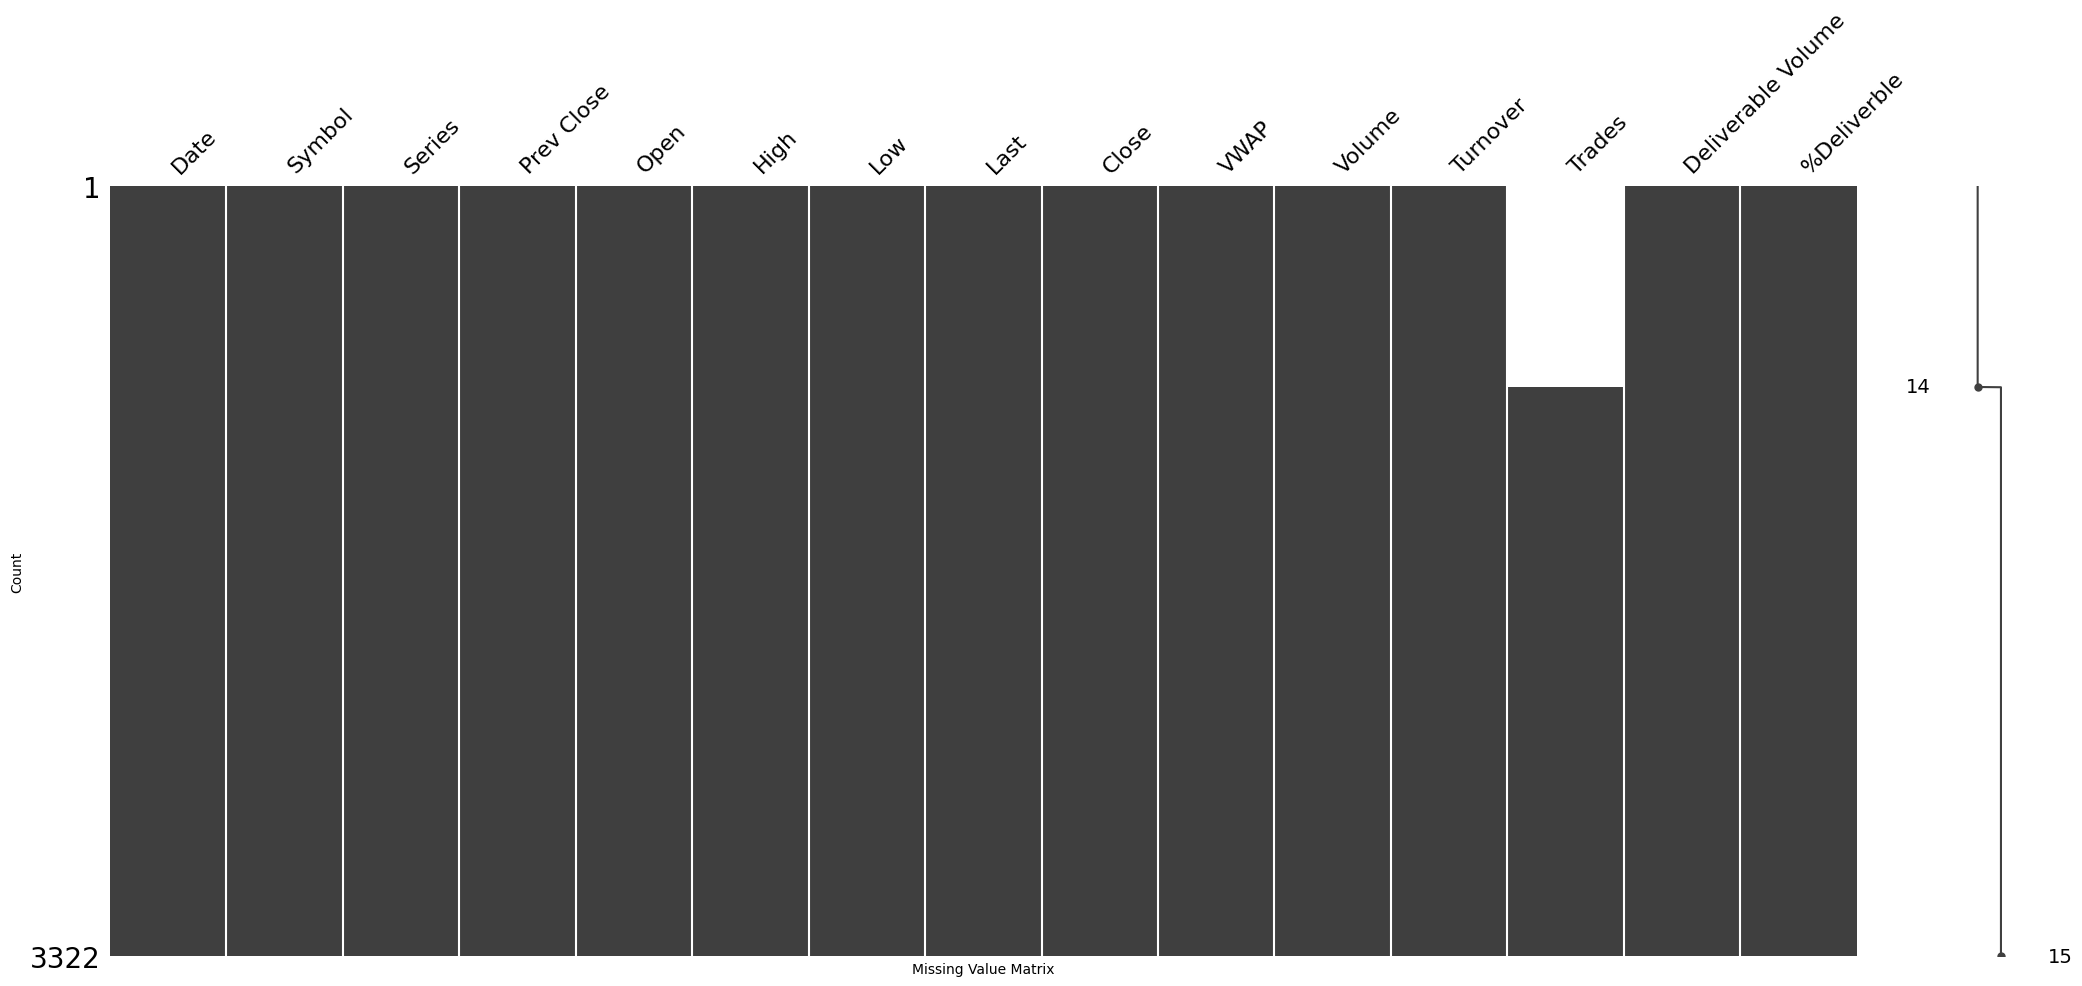

In [8]:
import missingno as msno
msno.matrix(df)
plt.xlabel("Missing Value Matrix")
plt.ylabel("Count")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [10]:
stockprice_one_year = df[(df['Date']>'2011-03-31')&(df['Date']<'2012-04-01')]
stockprice_one_year

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
826,2011-04-01,MUNDRAPORT,EQ,136.65,138.00,142.25,137.50,141.00,141.15,140.36,1716486,2.409280e+13,NaN,965478,0.5625
827,2011-04-04,MUNDRAPORT,EQ,141.15,142.35,149.10,141.50,148.95,148.20,146.00,1125553,1.643326e+13,NaN,501391,0.4455
828,2011-04-05,MUNDRAPORT,EQ,148.20,148.50,158.00,148.05,157.00,156.85,154.12,1712167,2.638708e+13,NaN,475131,0.2775
829,2011-04-06,MUNDRAPORT,EQ,156.85,158.00,158.40,152.25,154.15,153.65,155.05,934007,1.448215e+13,NaN,424174,0.4541
830,2011-04-07,MUNDRAPORT,EQ,153.65,154.75,157.00,152.70,155.75,155.75,154.85,1042870,1.614923e+13,NaN,663880,0.6366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,2012-03-26,ADANIPORTS,EQ,123.45,123.00,123.70,119.05,119.75,120.55,121.00,1124699,1.360846e+13,14021.0,602271,0.5355
1071,2012-03-27,ADANIPORTS,EQ,120.55,121.55,123.00,118.25,121.65,121.50,120.66,1098462,1.325451e+13,14310.0,487096,0.4434
1072,2012-03-28,ADANIPORTS,EQ,121.50,121.50,121.50,117.00,118.55,118.25,118.44,1756343,2.080279e+13,26906.0,1083219,0.6167
1073,2012-03-29,ADANIPORTS,EQ,118.25,118.00,125.50,116.10,124.15,124.20,120.57,2869127,3.459164e+13,29996.0,1933482,0.6739


In [11]:
stockprice_one_year.isnull().sum()

Date                   0
Symbol                 0
Series                 0
Prev Close             0
Open                   0
High                   0
Low                    0
Last                   0
Close                  0
VWAP                   0
Volume                 0
Turnover               0
Trades                40
Deliverable Volume     0
%Deliverble            0
dtype: int64

In [12]:
stockprice_one_year.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,209.000000,2.490000e+02,249.000000
mean,144.573293,144.885141,147.858635,141.528916,144.489357,144.544578,144.662289,1.535630e+06,2.207001e+13,13896.727273,9.089178e+05,0.534747
std,12.124482,12.221643,12.205498,12.348991,12.179215,12.151759,12.291169,1.673377e+06,2.535781e+13,7357.804577,1.350635e+06,0.137184
min,114.700000,117.500000,120.900000,111.000000,115.000000,114.700000,115.900000,2.209200e+04,3.235358e+11,417.000000,9.831000e+03,0.186900
25%,135.600000,135.000000,137.950000,131.950000,135.000000,135.500000,135.080000,7.216570e+05,1.043463e+13,8995.000000,3.379690e+05,0.438000
50%,146.800000,147.100000,149.800000,143.750000,146.600000,146.800000,146.690000,1.145520e+06,1.675321e+13,12293.000000,6.325790e+05,0.542200
75%,154.750000,155.050000,157.750000,151.650000,154.400000,154.750000,155.010000,1.744030e+06,2.530024e+13,17565.000000,1.029768e+06,0.620800
max,165.000000,165.050000,170.450000,163.550000,165.400000,165.000000,166.370000,2.066316e+07,3.322895e+14,46546.000000,1.726969e+07,0.943300


In [13]:
stockprice_one_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 826 to 1074
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                249 non-null    object 
 1   Symbol              249 non-null    object 
 2   Series              249 non-null    object 
 3   Prev Close          249 non-null    float64
 4   Open                249 non-null    float64
 5   High                249 non-null    float64
 6   Low                 249 non-null    float64
 7   Last                249 non-null    float64
 8   Close               249 non-null    float64
 9   VWAP                249 non-null    float64
 10  Volume              249 non-null    int64  
 11  Turnover            249 non-null    float64
 12  Trades              209 non-null    float64
 13  Deliverable Volume  249 non-null    int64  
 14  %Deliverble         249 non-null    float64
dtypes: float64(10), int64(2), object(3)
memory usage: 31.1

<Axes: >

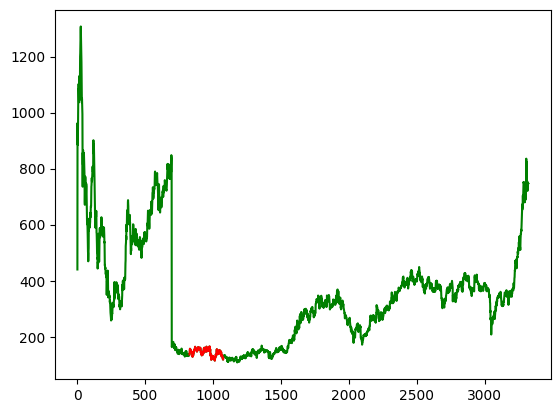

In [14]:
pl = df['Prev Close'].plot(c='green')
stockprice_one_year['Prev Close'].plot(ax=pl,c='red')

<Axes: >

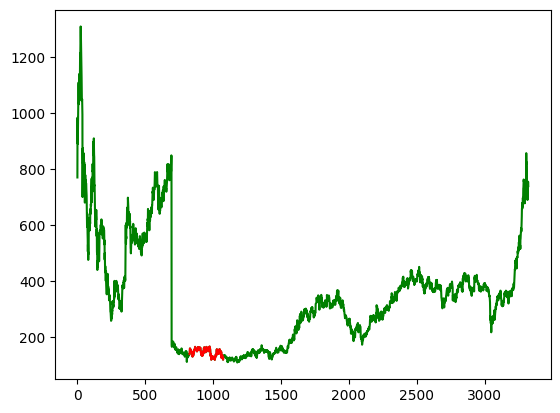

In [15]:
pl = df['Open'].plot(c='green')
stockprice_one_year['Open'].plot(ax=pl,c='red')

<Axes: >

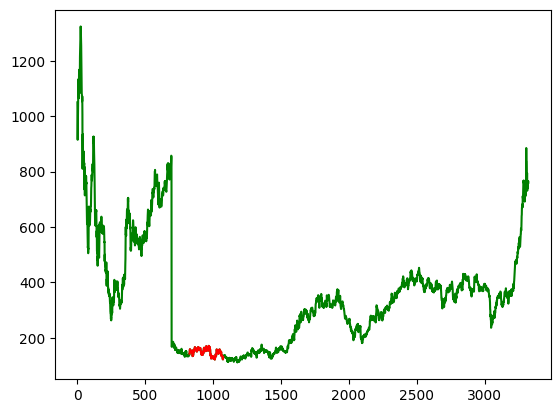

In [16]:
pl = df['High'].plot(c='green')
stockprice_one_year['High'].plot(ax=pl,c='red')

<Axes: >

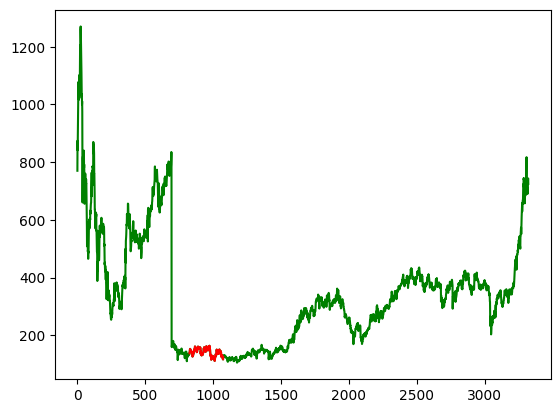

In [17]:
pl = df['Low'].plot(c='green')
stockprice_one_year['Low'].plot(ax=pl,c='red')

<Axes: >

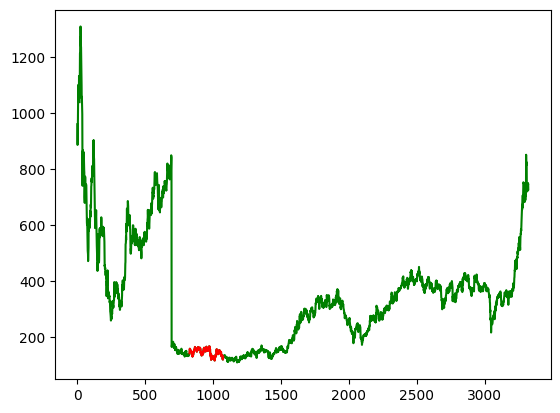

In [18]:
pl = df['Last'].plot(c='green')
stockprice_one_year['Last'].plot(ax=pl,c='red')

<Axes: >

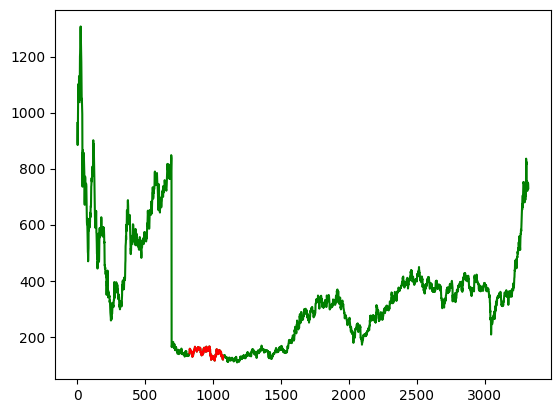

In [19]:
pl = df['Close'].plot(c='green')
stockprice_one_year['Close'].plot(ax=pl,c='red')

<Axes: >

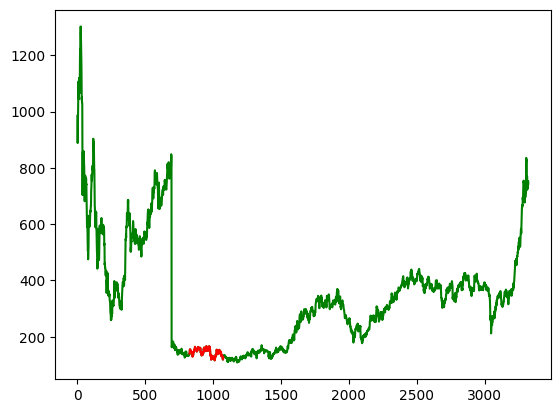

In [20]:
pl = df['VWAP'].plot(c='green')
stockprice_one_year['VWAP'].plot(ax=pl,c='red')

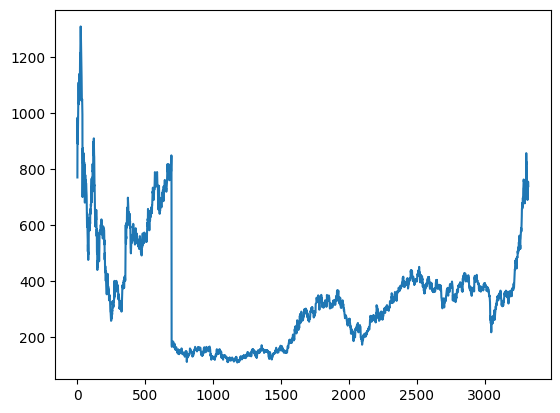

In [21]:
plt.plot(df['Open'])

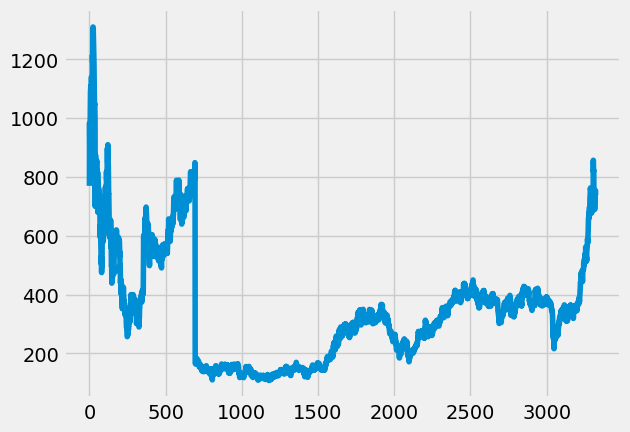

In [22]:
plt.style.use('fivethirtyeight')
plt.plot(df['Open'])

<Axes: >

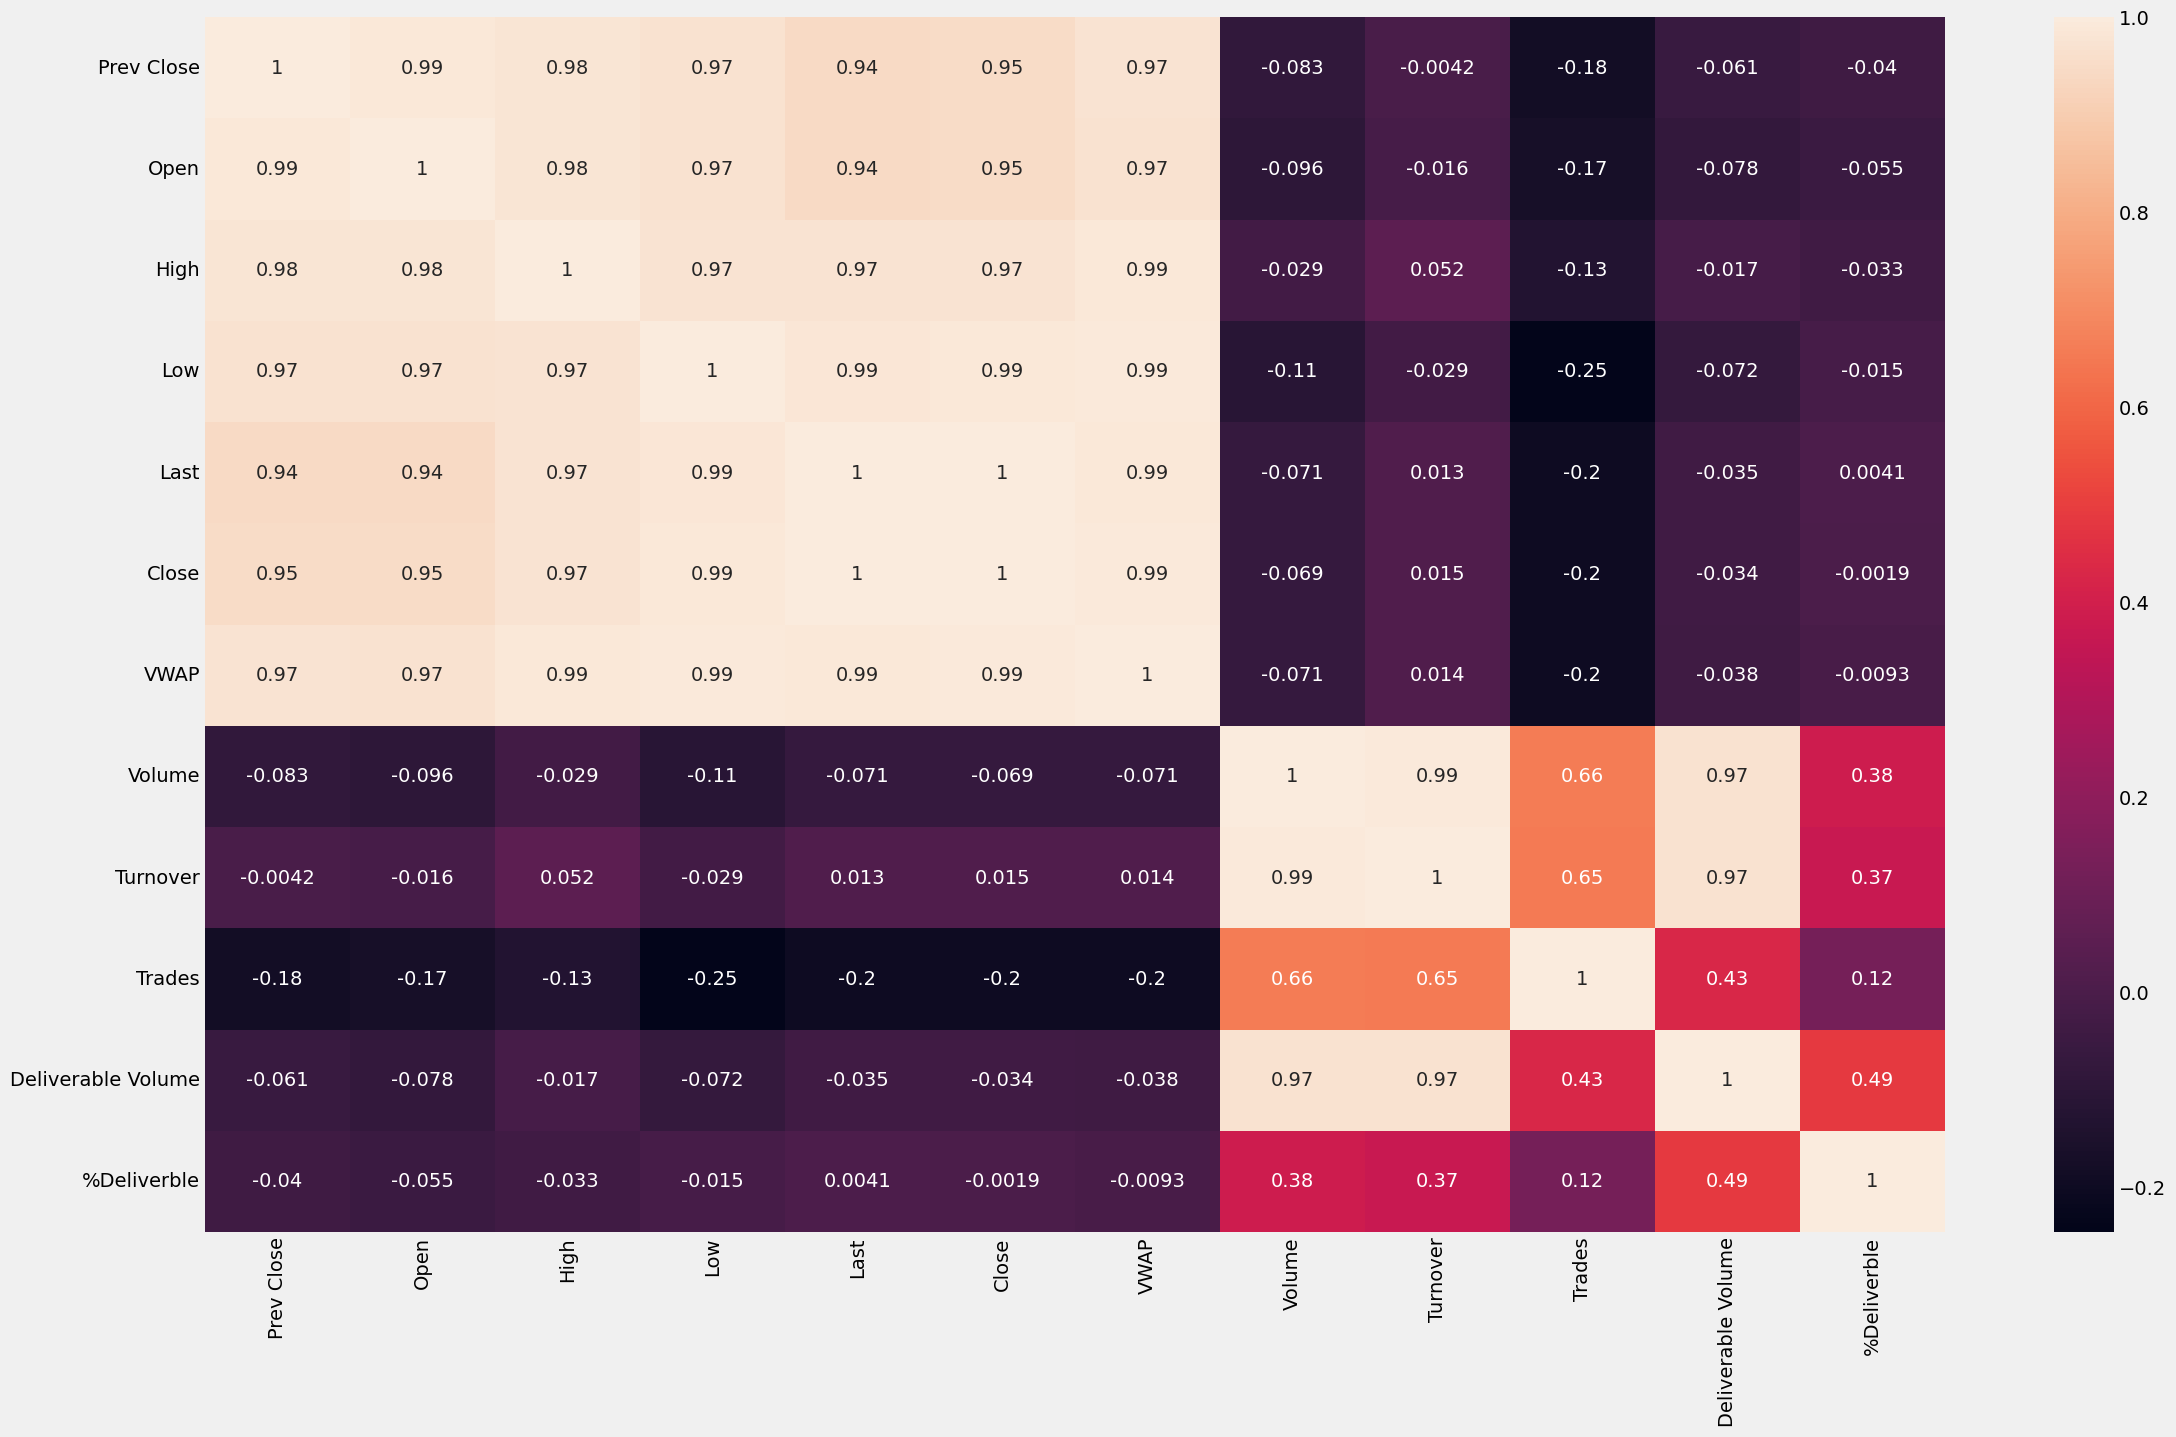

In [23]:
df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(stockprice_one_year.corr(method='pearson'), annot=True)

<Axes: xlabel='Date'>

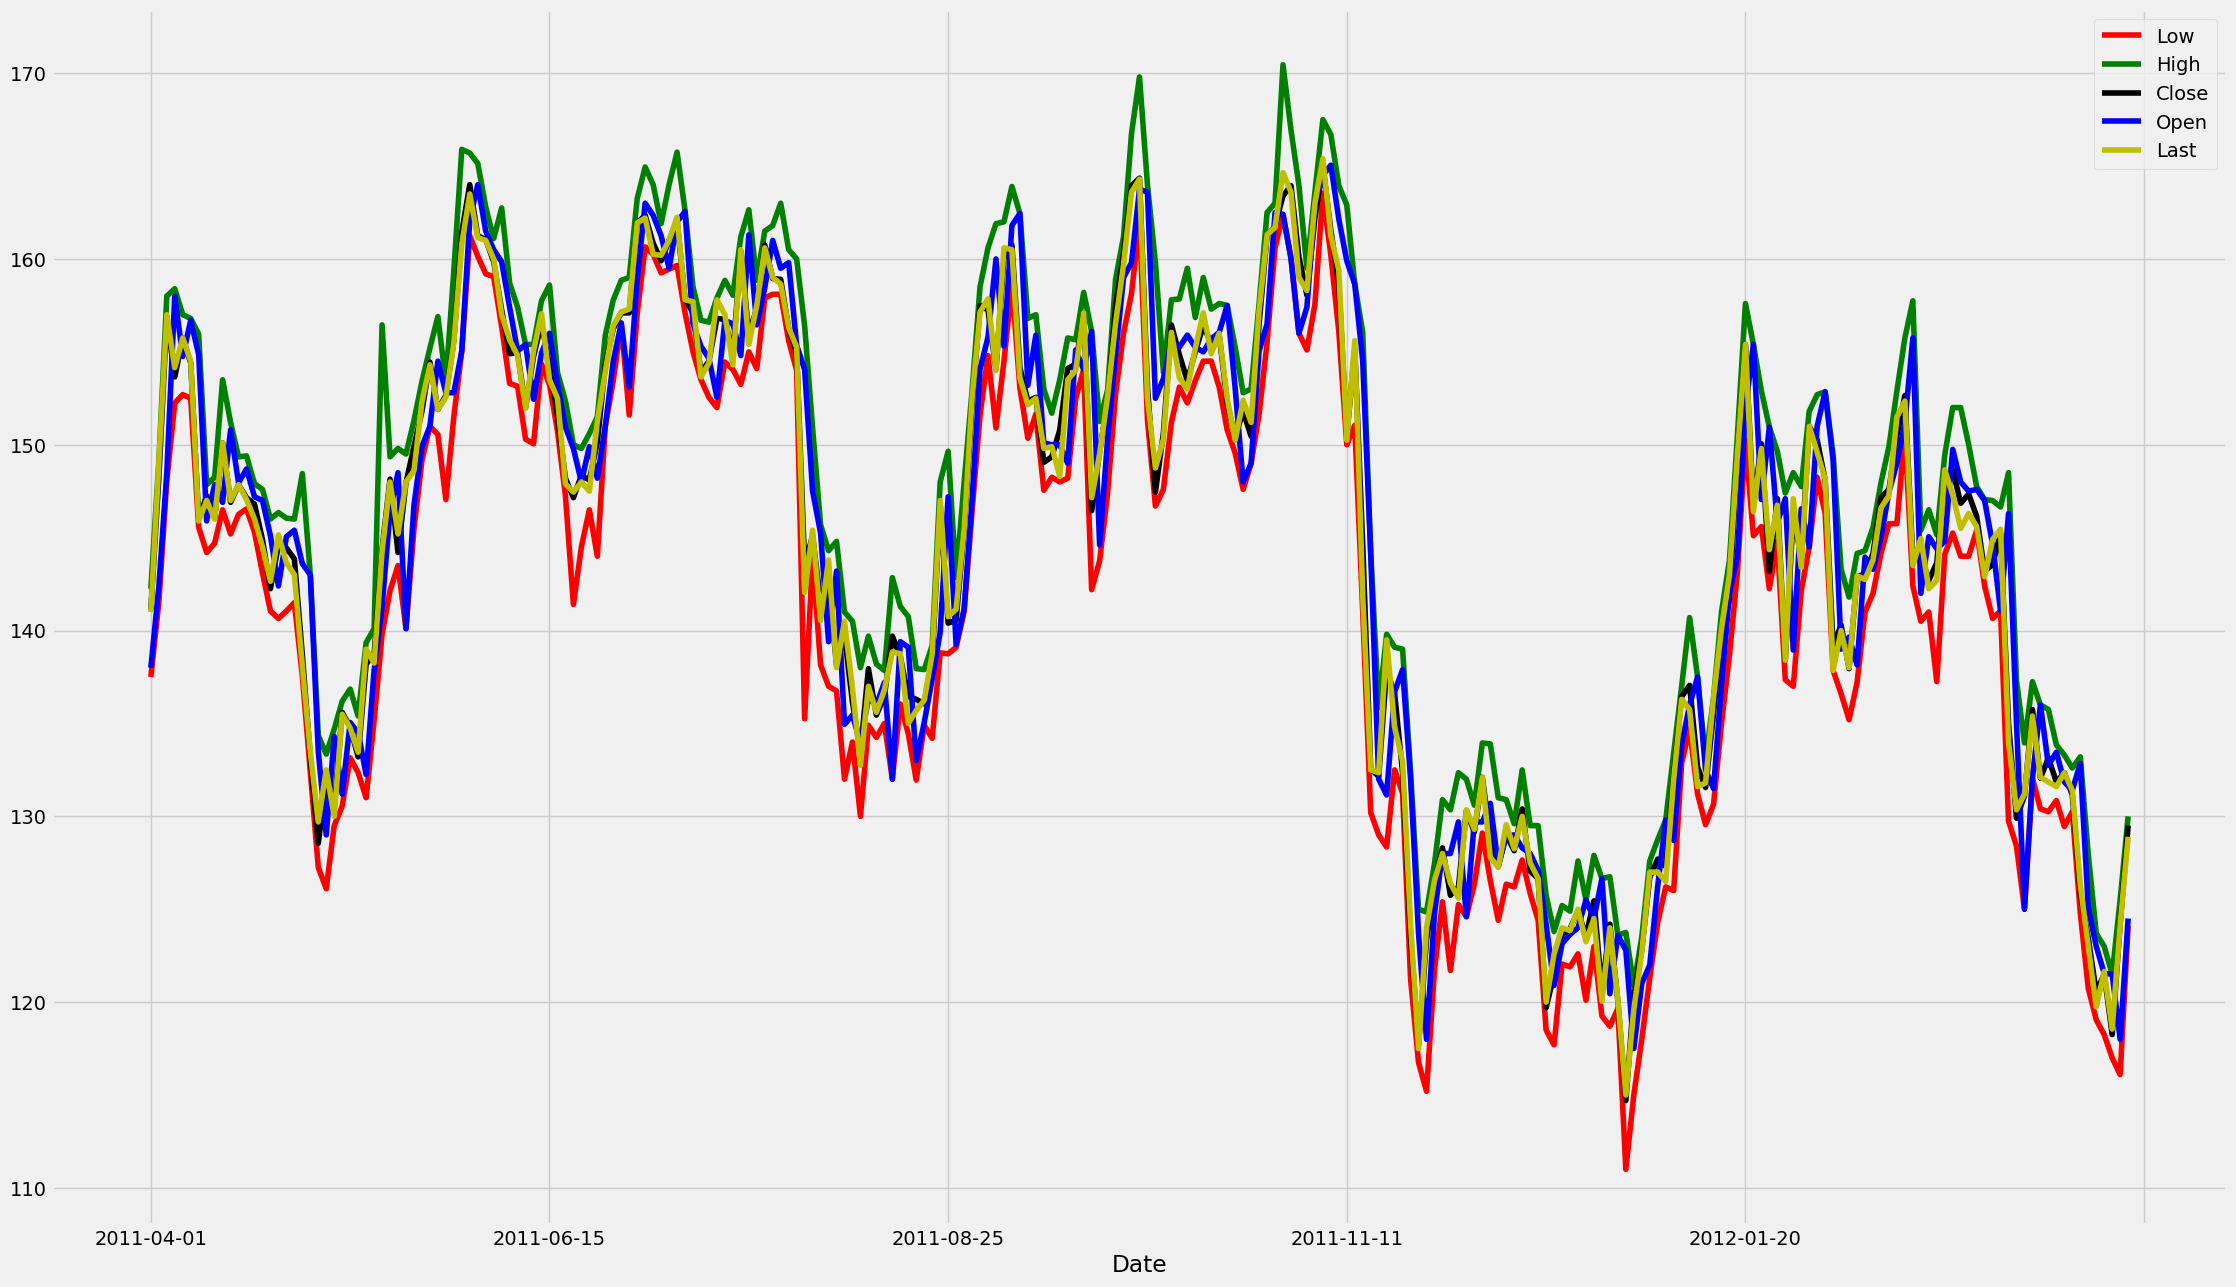

In [24]:
stockprice_one_year.plot(x="Date",y=["Low","High","Close","Open","Last"],color=['r','g','k','b','y'], figsize = [25,15])

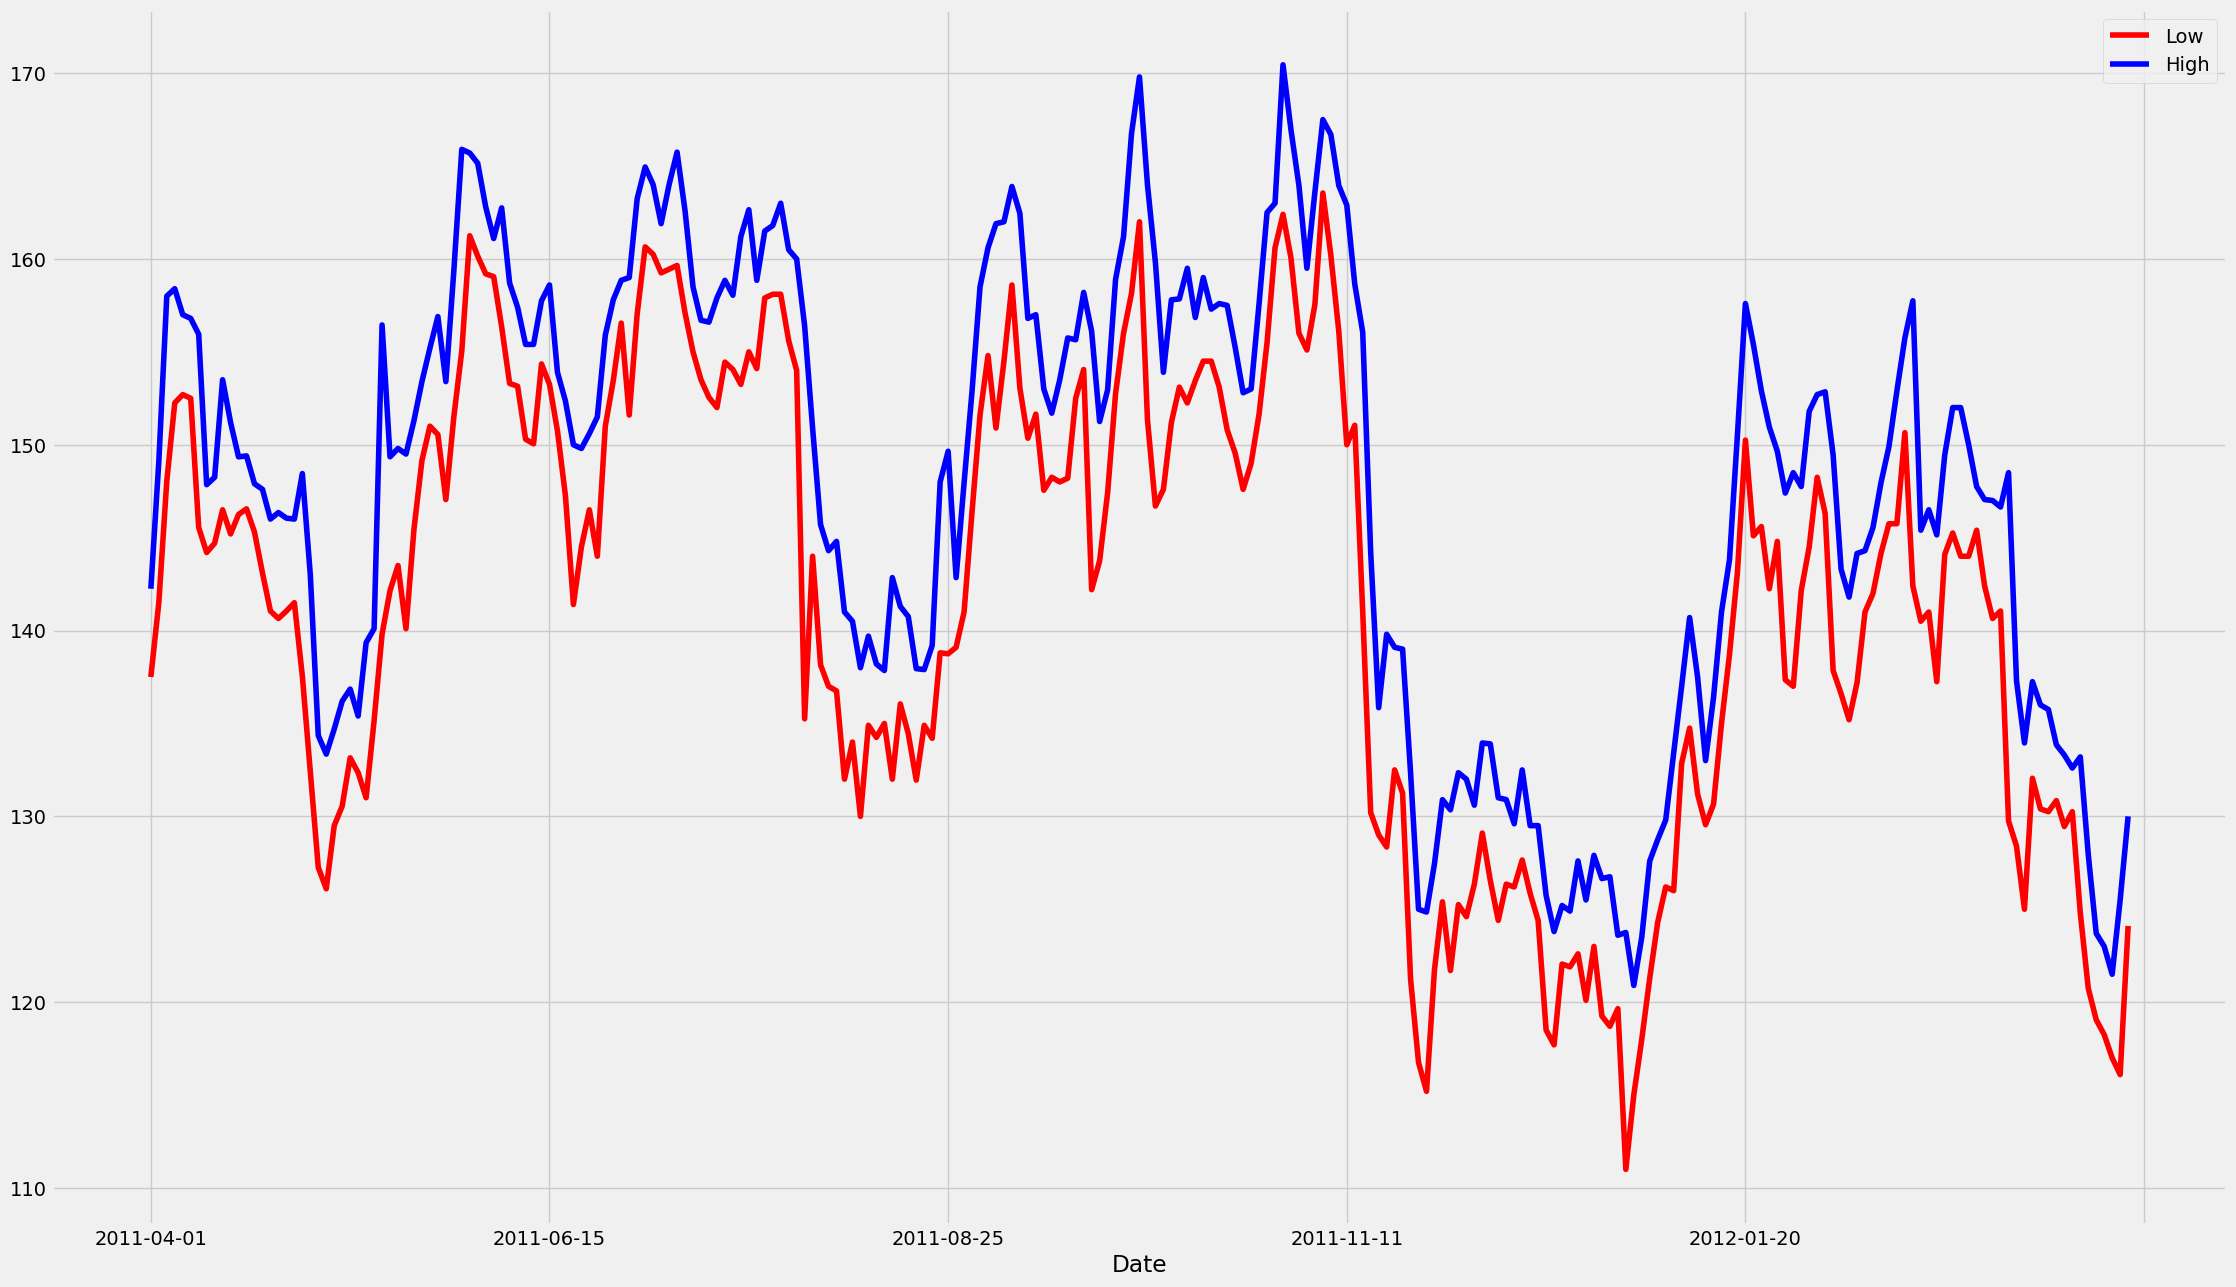

In [25]:
stockprice_one_year.plot(x="Date",y=["Low","High"],color=['r','b'], figsize = [25,15])
plt.show()

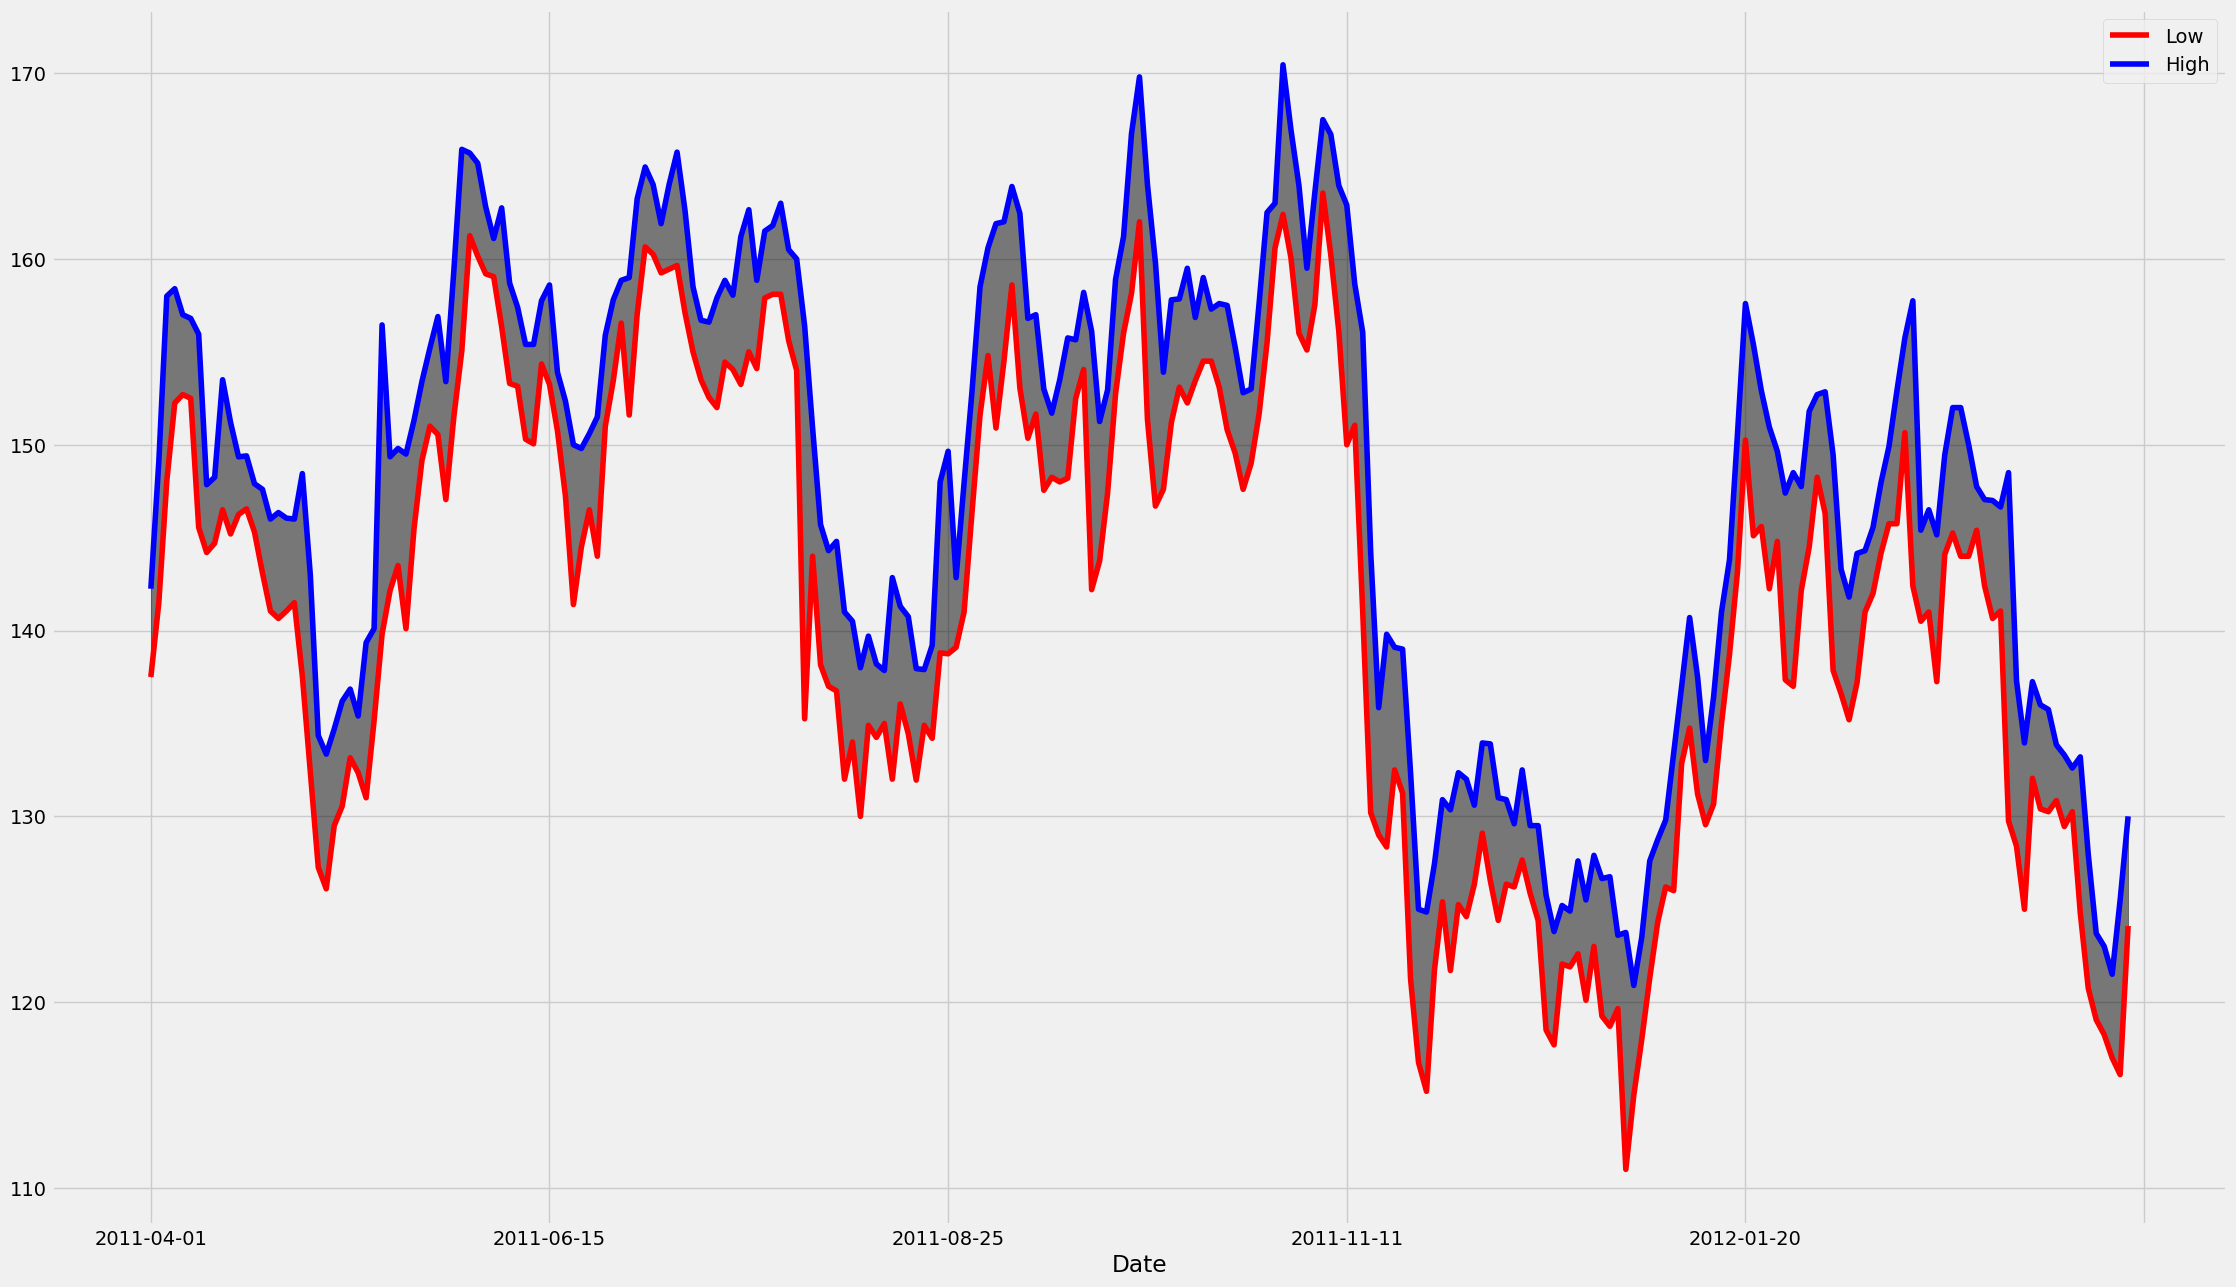

In [26]:
stockprice_one_year.plot(x="Date",y=["Low","High"],color = ['r','b'],figsize=[25,15])
plt.fill_between(stockprice_one_year['Date'], stockprice_one_year['Low'],stockprice_one_year['High'],color='k',alpha=0.5)
plt.show()

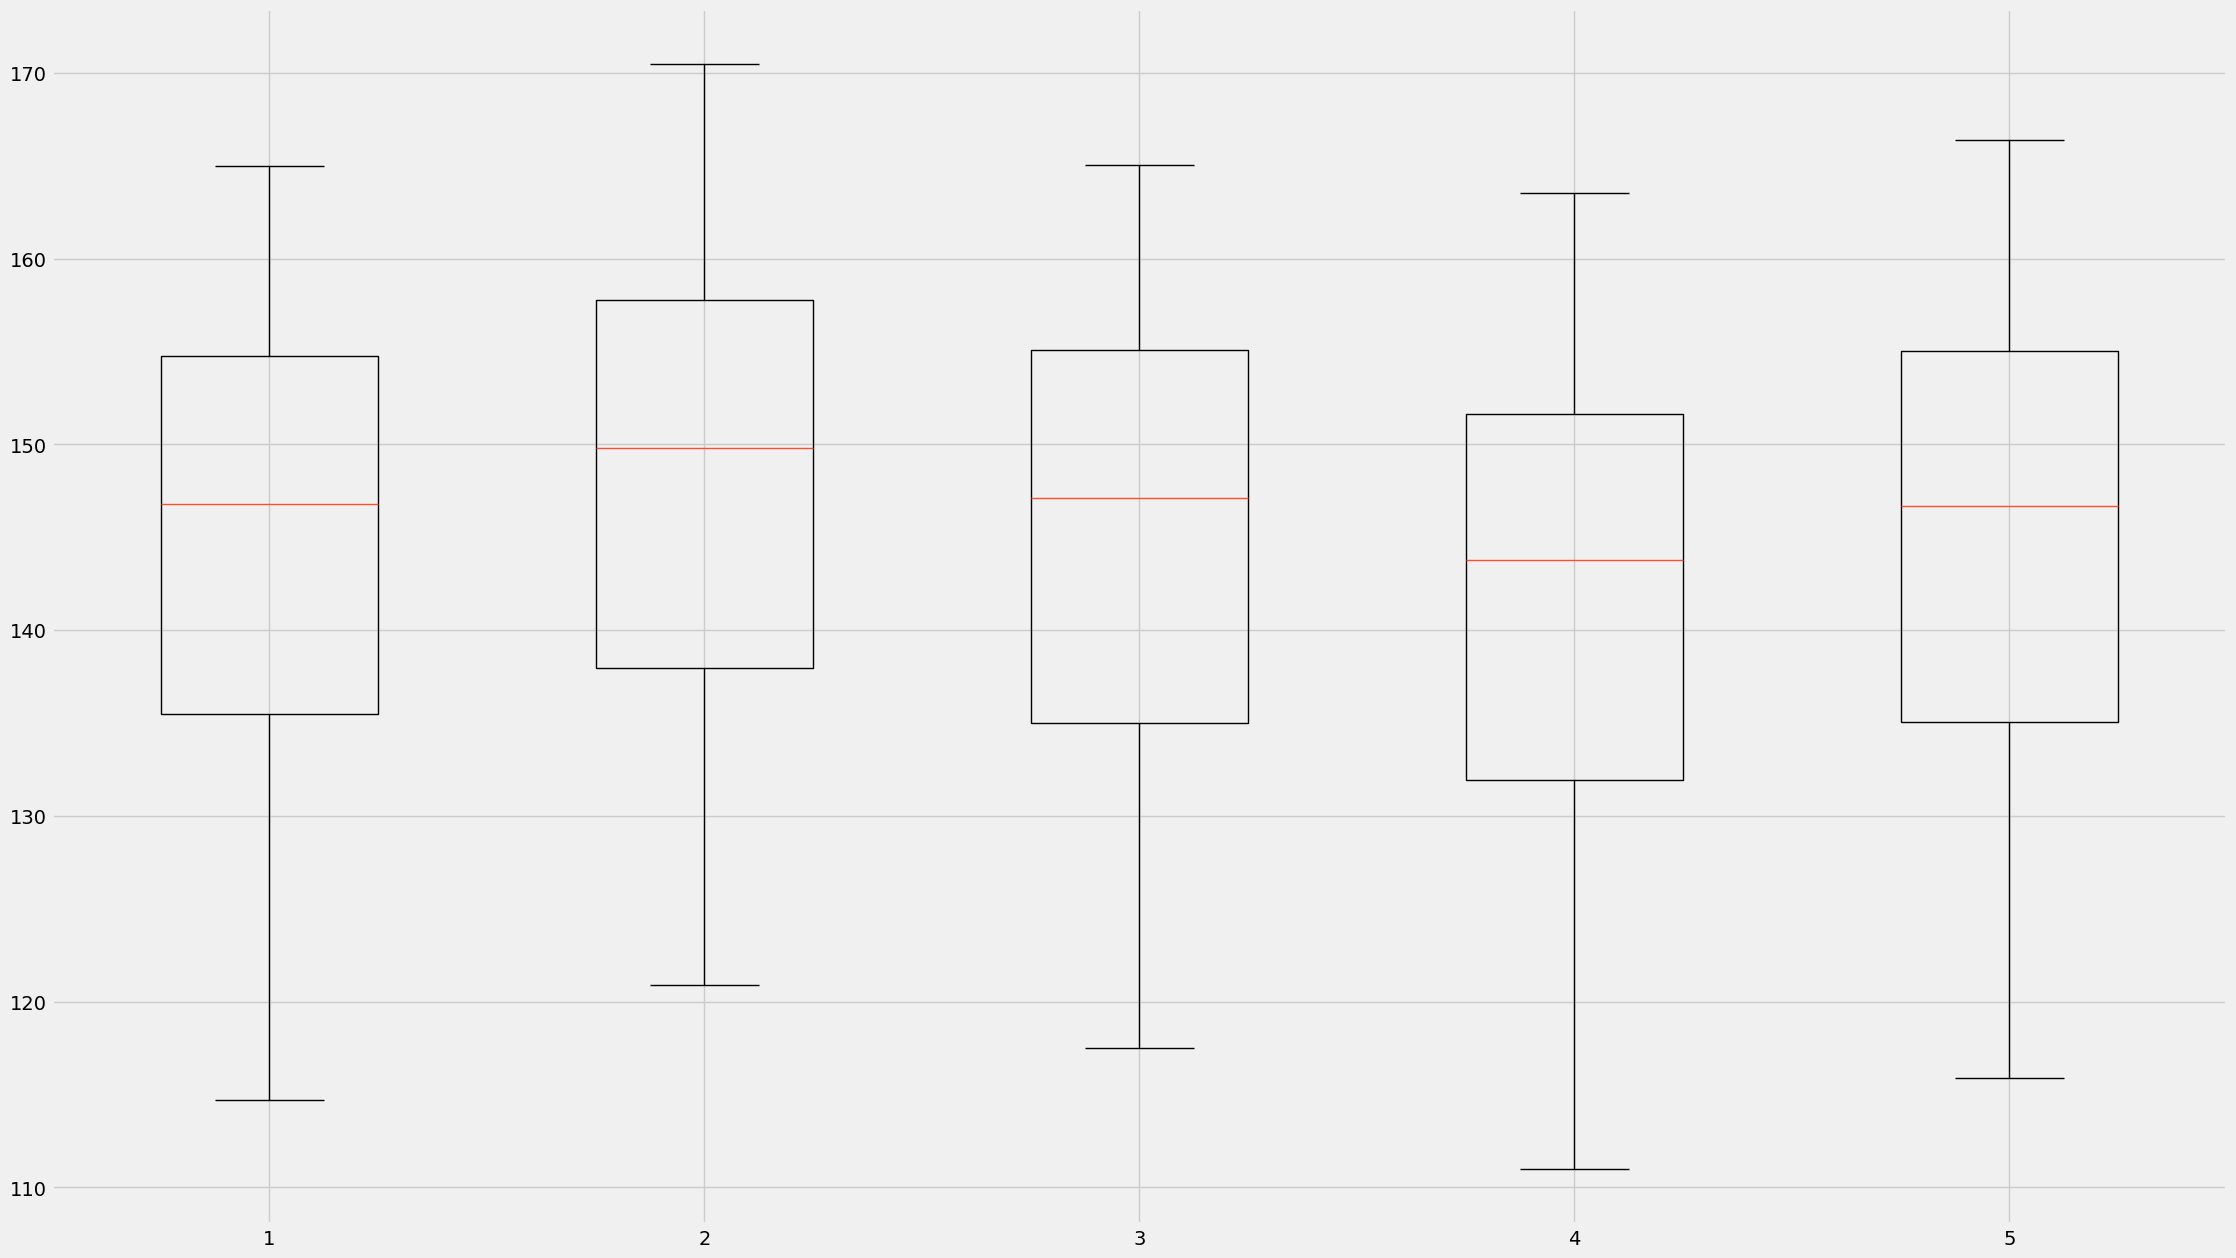

In [27]:
plt.figure(figsize=(25,15))
plt.boxplot(stockprice_one_year[['Close','High','Open','Low','VWAP']])
plt.show()

In [28]:
data = df[['Close','High','Open','Low','VWAP']]

In [29]:
df.set_index("Date", drop=False, inplace=True)

<Axes: xlabel='Date'>

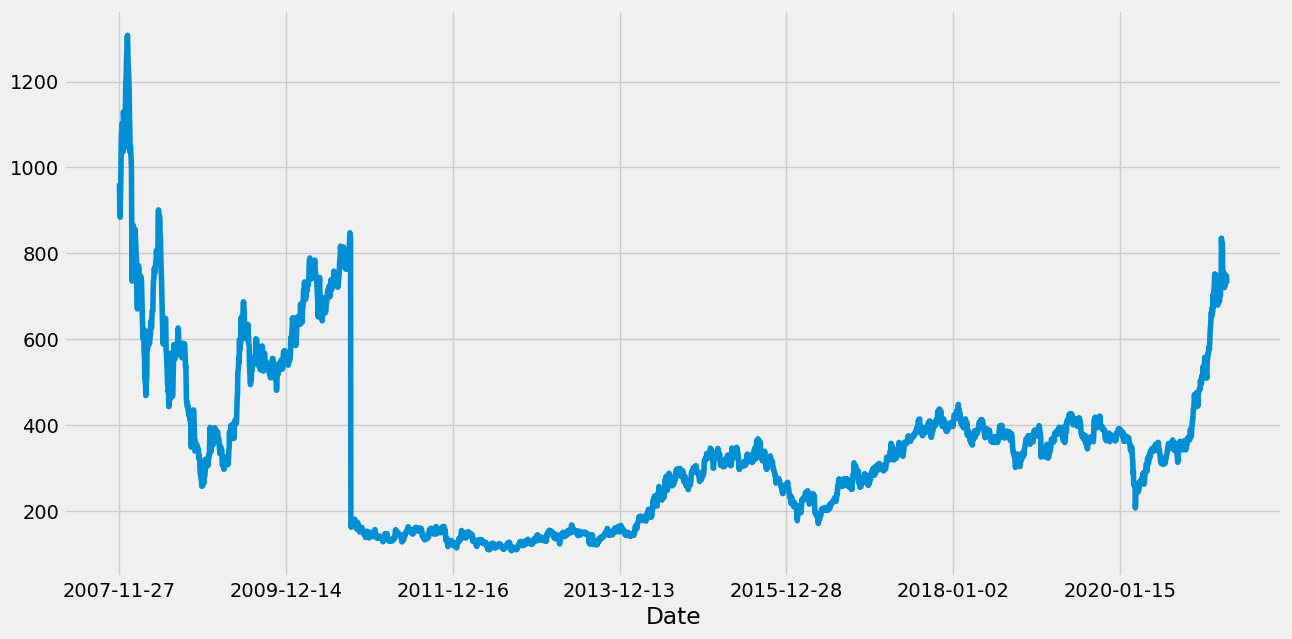

In [30]:
df.Close.plot(figsize=(14,7))

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3322 non-null   float64
 1   High    3322 non-null   float64
 2   Open    3322 non-null   float64
 3   Low     3322 non-null   float64
 4   VWAP    3322 non-null   float64
dtypes: float64(5)
memory usage: 129.9 KB


In [32]:
df.reset_index(drop=True,inplace=True)
lag_features = ["Open","High","Low","VWAP"]
window1 = 3
window2 = 7

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window1}"] = df_std_7d[feature].astype('float32')
    

In [33]:
df.fillna(df.mean(),inplace=True)

In [34]:
df.set_index("Date",drop=False,inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag3,High_mean_lag3,High_std_lag3,Low_mean_lag3,Low_std_lag3,VWAP_mean_lag3,VWAP_std_lag3
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,...,9859619,0.3612,344.659943,10.534451,351.568359,9.889764,337.428894,10.137928,344.800964,9.702688
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,1453278,0.3172,770.000000,10.534451,1050.000000,9.889764,770.000000,10.137928,984.719971,9.702688
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,1069678,0.2088,877.000000,151.320847,1020.000000,42.426407,822.000000,73.539108,963.049988,30.646008
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,1260913,0.2735,887.666687,108.583298,984.916687,67.768143,828.333313,53.144459,938.063354,48.400303
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,816123,0.2741,927.666687,88.665573,954.250000,56.945652,868.333313,53.231415,919.546692,39.768066


In [35]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"]= df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Open_std_lag3,High_mean_lag3,High_std_lag3,Low_mean_lag3,Low_std_lag3,VWAP_mean_lag3,VWAP_std_lag3,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,...,10.534451,351.568359,9.889764,337.428894,10.137928,344.800964,9.702688,11,27,1
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,10.534451,1050.000000,9.889764,770.000000,10.137928,984.719971,9.702688,11,28,2
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,151.320847,1020.000000,42.426407,822.000000,73.539108,963.049988,30.646008,11,29,3
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,108.583298,984.916687,67.768143,828.333313,53.144459,938.063354,48.400303,11,30,4
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,88.665573,954.250000,56.945652,868.333313,53.231415,919.546692,39.768066,12,3,0


In [36]:
df= df.drop(columns=['Symbol'])
df= df.drop(columns=['Series'])

In [37]:
df_train = df[df.Date<"2018"]
df_valid = df[df.Date >= "2018"]

In [38]:
df_valid.shape

(823, 24)

In [39]:
import tensorflow 
from sklearn.preprocessing import MinMaxScaler

In [41]:
df_train.head().T

Date,2007-11-27,2007-11-28,2007-11-29,2007-11-30,2007-12-03
Date,2007-11-27 00:00:00,2007-11-28 00:00:00,2007-11-29 00:00:00,2007-11-30 00:00:00,2007-12-03 00:00:00
Prev Close,440.0,962.9,893.9,884.2,921.55
Open,770.0,984.0,909.0,890.0,939.75
High,1050.0,990.0,914.75,958.0,995.0
Low,770.0,874.0,841.0,890.0,922.0
Last,959.0,885.0,887.0,929.0,980.0
Close,962.9,893.9,884.2,921.55,969.3
VWAP,984.72,941.38,888.09,929.17,965.65
Volume,27294366,4581338,5124121,4609762,2977470
Turnover,2687719053785000.0,431276530165000.0,455065846265000.0,428325662830000.0,287519974300000.0


In [42]:
y_train = df_train["Close"]
scaler = MinMaxScaler(feature_range=(0,1))
y_train1=scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_trainn= df_train["Close"].to_numpy().reshape(-1,1)

In [43]:
y_valid = df_valid["Close"]
scaler1 = MinMaxScaler(feature_range=(0,1))
y_valid1=scaler.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
y_validn= df_valid["Close"].to_numpy().reshape(-1,1)

In [45]:
x_train = df_train.drop(columns = ["Close"])
x_train1 = x_train.drop("Date",axis=1)
x_train1 = (x_train1-x_train1.min())/(x_train1.max()-x_train1.min())
x_train2 = pd.concat((x_train1,x_train.Date),1)

In [46]:
x_valid = df_valid.drop(columns = ["Close"])
x_valid1 = x_valid.drop("Date",axis=1)
x_valid1 = (x_valid1-x_valid1.min())/(x_valid1.max()-x_valid1.min())
x_valid2 = pd.concat((x_valid1,x_valid.Date),1)

In [47]:
x_train3 = x_train2.drop(columns=['Date']).to_numpy()
x_valid3 = x_valid2.drop(columns=['Date']).to_numpy()

In [48]:
y_train1 = y_train1.reshape(-1,1)
y_valid1 = y_valid1.reshape(-1,1)

In [50]:
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

In [52]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

xgb.fit(x_train3,y_train1,eval_set=[(x_train3,y_train1),(x_valid3,y_valid1)],early_stopping_rounds=100,verbose=True)

[0]	validation_0-rmse:0.35983	validation_1-rmse:0.25083
[1]	validation_0-rmse:0.35625	validation_1-rmse:0.24825
[2]	validation_0-rmse:0.35270	validation_1-rmse:0.24568
[3]	validation_0-rmse:0.34919	validation_1-rmse:0.24314
[4]	validation_0-rmse:0.34571	validation_1-rmse:0.24062
[5]	validation_0-rmse:0.34227	validation_1-rmse:0.23814
[6]	validation_0-rmse:0.33887	validation_1-rmse:0.23567
[7]	validation_0-rmse:0.33549	validation_1-rmse:0.23324
[8]	validation_0-rmse:0.33215	validation_1-rmse:0.23081
[9]	validation_0-rmse:0.32885	validation_1-rmse:0.22843
[10]	validation_0-rmse:0.32558	validation_1-rmse:0.22605
[11]	validation_0-rmse:0.32234	validation_1-rmse:0.22371
[12]	validation_0-rmse:0.31913	validation_1-rmse:0.22139
[13]	validation_0-rmse:0.31595	validation_1-rmse:0.21910
[14]	validation_0-rmse:0.31281	validation_1-rmse:0.21683
[15]	validation_0-rmse:0.30969	validation_1-rmse:0.21459
[16]	validation_0-rmse:0.30661	validation_1-rmse:0.21236
[17]	validation_0-rmse:0.30356	validation

[144]	validation_0-rmse:0.08532	validation_1-rmse:0.05341
[145]	validation_0-rmse:0.08448	validation_1-rmse:0.05281
[146]	validation_0-rmse:0.08364	validation_1-rmse:0.05223
[147]	validation_0-rmse:0.08281	validation_1-rmse:0.05165
[148]	validation_0-rmse:0.08198	validation_1-rmse:0.05107
[149]	validation_0-rmse:0.08117	validation_1-rmse:0.05051
[150]	validation_0-rmse:0.08036	validation_1-rmse:0.04994
[151]	validation_0-rmse:0.07956	validation_1-rmse:0.04938
[152]	validation_0-rmse:0.07877	validation_1-rmse:0.04883
[153]	validation_0-rmse:0.07799	validation_1-rmse:0.04829
[154]	validation_0-rmse:0.07722	validation_1-rmse:0.04775
[155]	validation_0-rmse:0.07645	validation_1-rmse:0.04722
[156]	validation_0-rmse:0.07569	validation_1-rmse:0.04670
[157]	validation_0-rmse:0.07494	validation_1-rmse:0.04617
[158]	validation_0-rmse:0.07419	validation_1-rmse:0.04565
[159]	validation_0-rmse:0.07346	validation_1-rmse:0.04515
[160]	validation_0-rmse:0.07273	validation_1-rmse:0.04464
[161]	validati

[286]	validation_0-rmse:0.02072	validation_1-rmse:0.01335
[287]	validation_0-rmse:0.02051	validation_1-rmse:0.01329
[288]	validation_0-rmse:0.02031	validation_1-rmse:0.01323
[289]	validation_0-rmse:0.02011	validation_1-rmse:0.01317
[290]	validation_0-rmse:0.01991	validation_1-rmse:0.01312
[291]	validation_0-rmse:0.01971	validation_1-rmse:0.01306
[292]	validation_0-rmse:0.01952	validation_1-rmse:0.01301
[293]	validation_0-rmse:0.01932	validation_1-rmse:0.01296
[294]	validation_0-rmse:0.01913	validation_1-rmse:0.01291
[295]	validation_0-rmse:0.01894	validation_1-rmse:0.01286
[296]	validation_0-rmse:0.01876	validation_1-rmse:0.01282
[297]	validation_0-rmse:0.01857	validation_1-rmse:0.01278
[298]	validation_0-rmse:0.01839	validation_1-rmse:0.01274
[299]	validation_0-rmse:0.01821	validation_1-rmse:0.01270
[300]	validation_0-rmse:0.01803	validation_1-rmse:0.01266
[301]	validation_0-rmse:0.01785	validation_1-rmse:0.01262
[302]	validation_0-rmse:0.01767	validation_1-rmse:0.01259
[303]	validati

[428]	validation_0-rmse:0.00510	validation_1-rmse:0.01323
[429]	validation_0-rmse:0.00505	validation_1-rmse:0.01325
[430]	validation_0-rmse:0.00500	validation_1-rmse:0.01326
[431]	validation_0-rmse:0.00496	validation_1-rmse:0.01328
[432]	validation_0-rmse:0.00491	validation_1-rmse:0.01329
[433]	validation_0-rmse:0.00486	validation_1-rmse:0.01330
[434]	validation_0-rmse:0.00481	validation_1-rmse:0.01331
[435]	validation_0-rmse:0.00477	validation_1-rmse:0.01333


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1200x800 with 0 Axes>

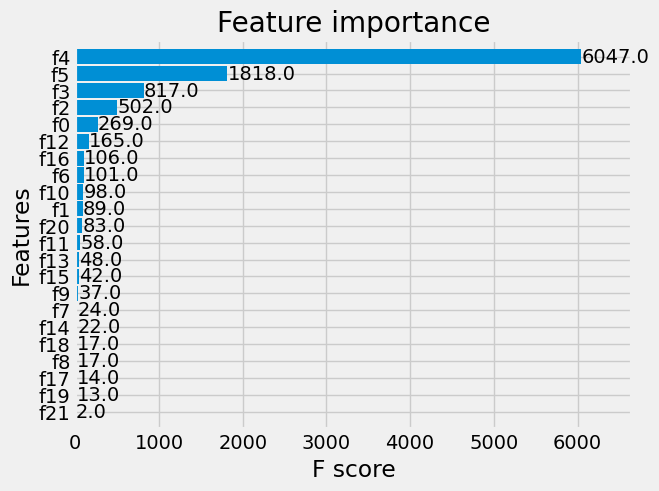

In [54]:
plt.figure(figsize=(12,8))
feature_importance = plot_importance(xgb, height=0.9)
feature_importance

In [63]:
predicted_results_v = xgb.predict(x_valid3)
predicted_results_t = xgb.predict(x_train3)
predicted_results_v = predicted_results_v.reshape(-1,1)
predicted_results_t = predicted_results_t.reshape(-1,1)
predicted_results_v = scaler.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

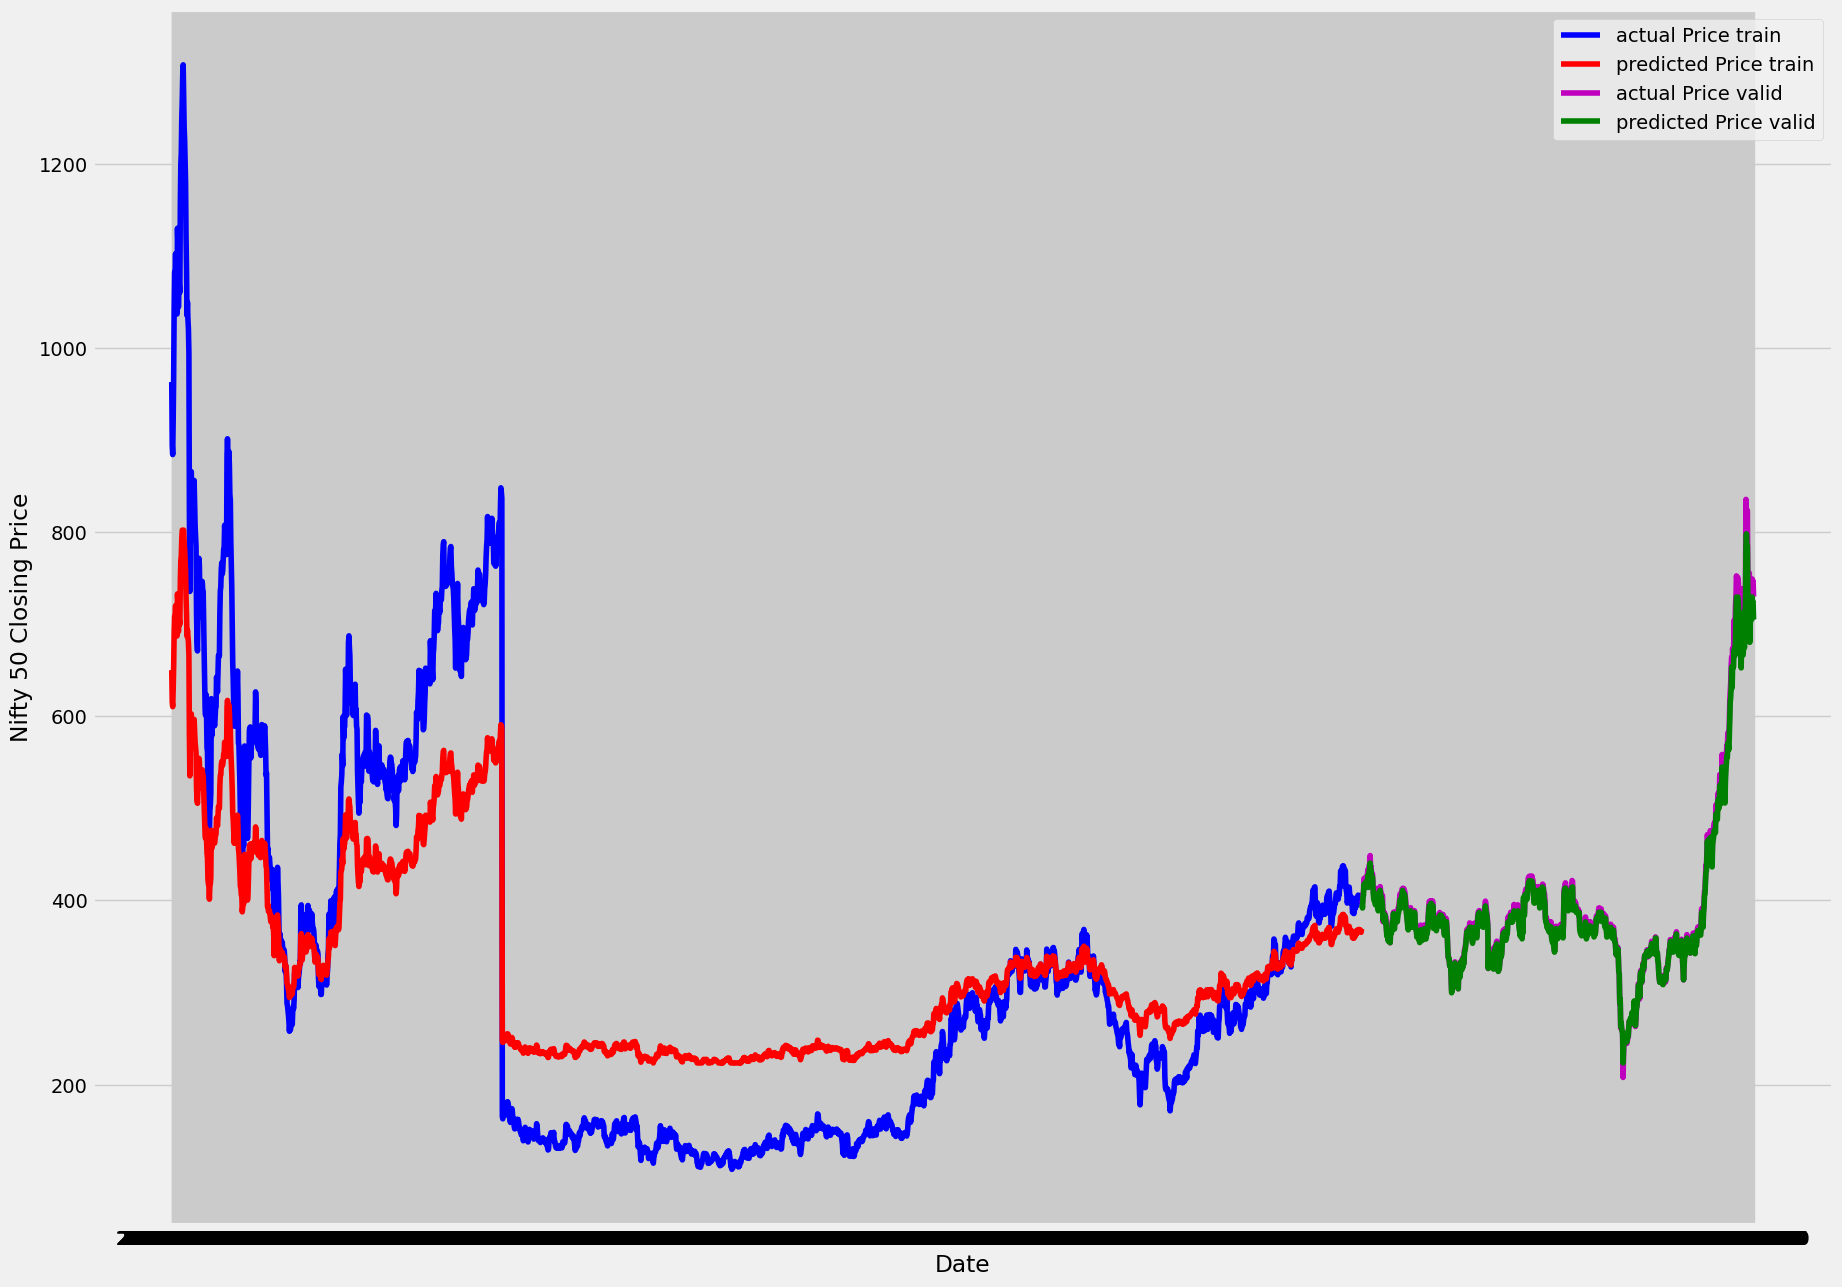

In [64]:
plt.figure(figsize=(20,15))
plt.plot(x_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(x_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(x_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(x_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel("Nifty 50 Closing Price")
plt.legend()
plt.show()

In [69]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.0099,max_dept=15)
xgb

xgb.fit(x_train3,y_train1,
       eval_set=[(x_train3,y_train1),(x_valid3,y_valid1)],
       early_stopping_rounds=100,
       verbose=True)

[14:59:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_dept" } are not used.

[0]	validation_0-rmse:0.35986	validation_1-rmse:0.25086
[1]	validation_0-rmse:0.35632	validation_1-rmse:0.24830
[2]	validation_0-rmse:0.35281	validation_1-rmse:0.24575
[3]	validation_0-rmse:0.34933	validation_1-rmse:0.24324
[4]	validation_0-rmse:0.34589	validation_1-rmse:0.24075
[5]	validation_0-rmse:0.34248	validation_1-rmse:0.23829
[6]	validation_0-rmse:0.33910	validation_1-rmse:0.23584
[7]	validation_0-rmse:0.33576	validation_1-rmse:0.23342
[8]	validation_0-rmse:0.33246	validation_1-rmse:0.23104
[9]	validation_0-rmse:0.32918	validation_1-rmse:0.22865
[10]	validation_0-rmse:0.32594	validation_1-rmse:0.22630
[11]	validation_0-rmse:0.32272	validation_1-rmse:0.22398
[12]	validation_0-rmse:0.31955	validation_1-rmse:0.22168
[13]	validation_0-rmse:0.31640	validation_1-rmse:0.21941
[14]	validatio

[140]	validation_0-rmse:0.09007	validation_1-rmse:0.05677
[141]	validation_0-rmse:0.08918	validation_1-rmse:0.05615
[142]	validation_0-rmse:0.08830	validation_1-rmse:0.05553
[143]	validation_0-rmse:0.08743	validation_1-rmse:0.05493
[144]	validation_0-rmse:0.08658	validation_1-rmse:0.05432
[145]	validation_0-rmse:0.08572	validation_1-rmse:0.05372
[146]	validation_0-rmse:0.08488	validation_1-rmse:0.05314
[147]	validation_0-rmse:0.08405	validation_1-rmse:0.05255
[148]	validation_0-rmse:0.08322	validation_1-rmse:0.05197
[149]	validation_0-rmse:0.08240	validation_1-rmse:0.05140
[150]	validation_0-rmse:0.08159	validation_1-rmse:0.05083
[151]	validation_0-rmse:0.08079	validation_1-rmse:0.05027
[152]	validation_0-rmse:0.07999	validation_1-rmse:0.04970
[153]	validation_0-rmse:0.07921	validation_1-rmse:0.04916
[154]	validation_0-rmse:0.07843	validation_1-rmse:0.04862
[155]	validation_0-rmse:0.07766	validation_1-rmse:0.04808
[156]	validation_0-rmse:0.07689	validation_1-rmse:0.04755
[157]	validati

[282]	validation_0-rmse:0.02218	validation_1-rmse:0.01381
[283]	validation_0-rmse:0.02196	validation_1-rmse:0.01373
[284]	validation_0-rmse:0.02174	validation_1-rmse:0.01366
[285]	validation_0-rmse:0.02153	validation_1-rmse:0.01359
[286]	validation_0-rmse:0.02132	validation_1-rmse:0.01353
[287]	validation_0-rmse:0.02111	validation_1-rmse:0.01346
[288]	validation_0-rmse:0.02090	validation_1-rmse:0.01340
[289]	validation_0-rmse:0.02070	validation_1-rmse:0.01334
[290]	validation_0-rmse:0.02050	validation_1-rmse:0.01328
[291]	validation_0-rmse:0.02030	validation_1-rmse:0.01323
[292]	validation_0-rmse:0.02010	validation_1-rmse:0.01317
[293]	validation_0-rmse:0.01990	validation_1-rmse:0.01312
[294]	validation_0-rmse:0.01971	validation_1-rmse:0.01306
[295]	validation_0-rmse:0.01951	validation_1-rmse:0.01301
[296]	validation_0-rmse:0.01932	validation_1-rmse:0.01296
[297]	validation_0-rmse:0.01913	validation_1-rmse:0.01291
[298]	validation_0-rmse:0.01894	validation_1-rmse:0.01287
[299]	validati

[423]	validation_0-rmse:0.00558	validation_1-rmse:0.01308
[424]	validation_0-rmse:0.00553	validation_1-rmse:0.01309
[425]	validation_0-rmse:0.00548	validation_1-rmse:0.01310
[426]	validation_0-rmse:0.00542	validation_1-rmse:0.01311
[427]	validation_0-rmse:0.00537	validation_1-rmse:0.01313
[428]	validation_0-rmse:0.00532	validation_1-rmse:0.01314
[429]	validation_0-rmse:0.00527	validation_1-rmse:0.01316
[430]	validation_0-rmse:0.00522	validation_1-rmse:0.01317
[431]	validation_0-rmse:0.00517	validation_1-rmse:0.01319
[432]	validation_0-rmse:0.00512	validation_1-rmse:0.01320
[433]	validation_0-rmse:0.00507	validation_1-rmse:0.01321
[434]	validation_0-rmse:0.00502	validation_1-rmse:0.01323
[435]	validation_0-rmse:0.00497	validation_1-rmse:0.01324
[436]	validation_0-rmse:0.00493	validation_1-rmse:0.01326
[437]	validation_0-rmse:0.00488	validation_1-rmse:0.01327
[438]	validation_0-rmse:0.00483	validation_1-rmse:0.01328
[439]	validation_0-rmse:0.00479	validation_1-rmse:0.01330


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0099, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_dept=15, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [70]:
predicted_results_v = xgb.predict(x_valid3)
predicted_results_t = xgb.predict(x_train3)
predicted_results_v = predicted_results_v.reshape(-1,1)
predicted_results_t = predicted_results_t.reshape(-1,1)
predicted_results_v = scaler.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

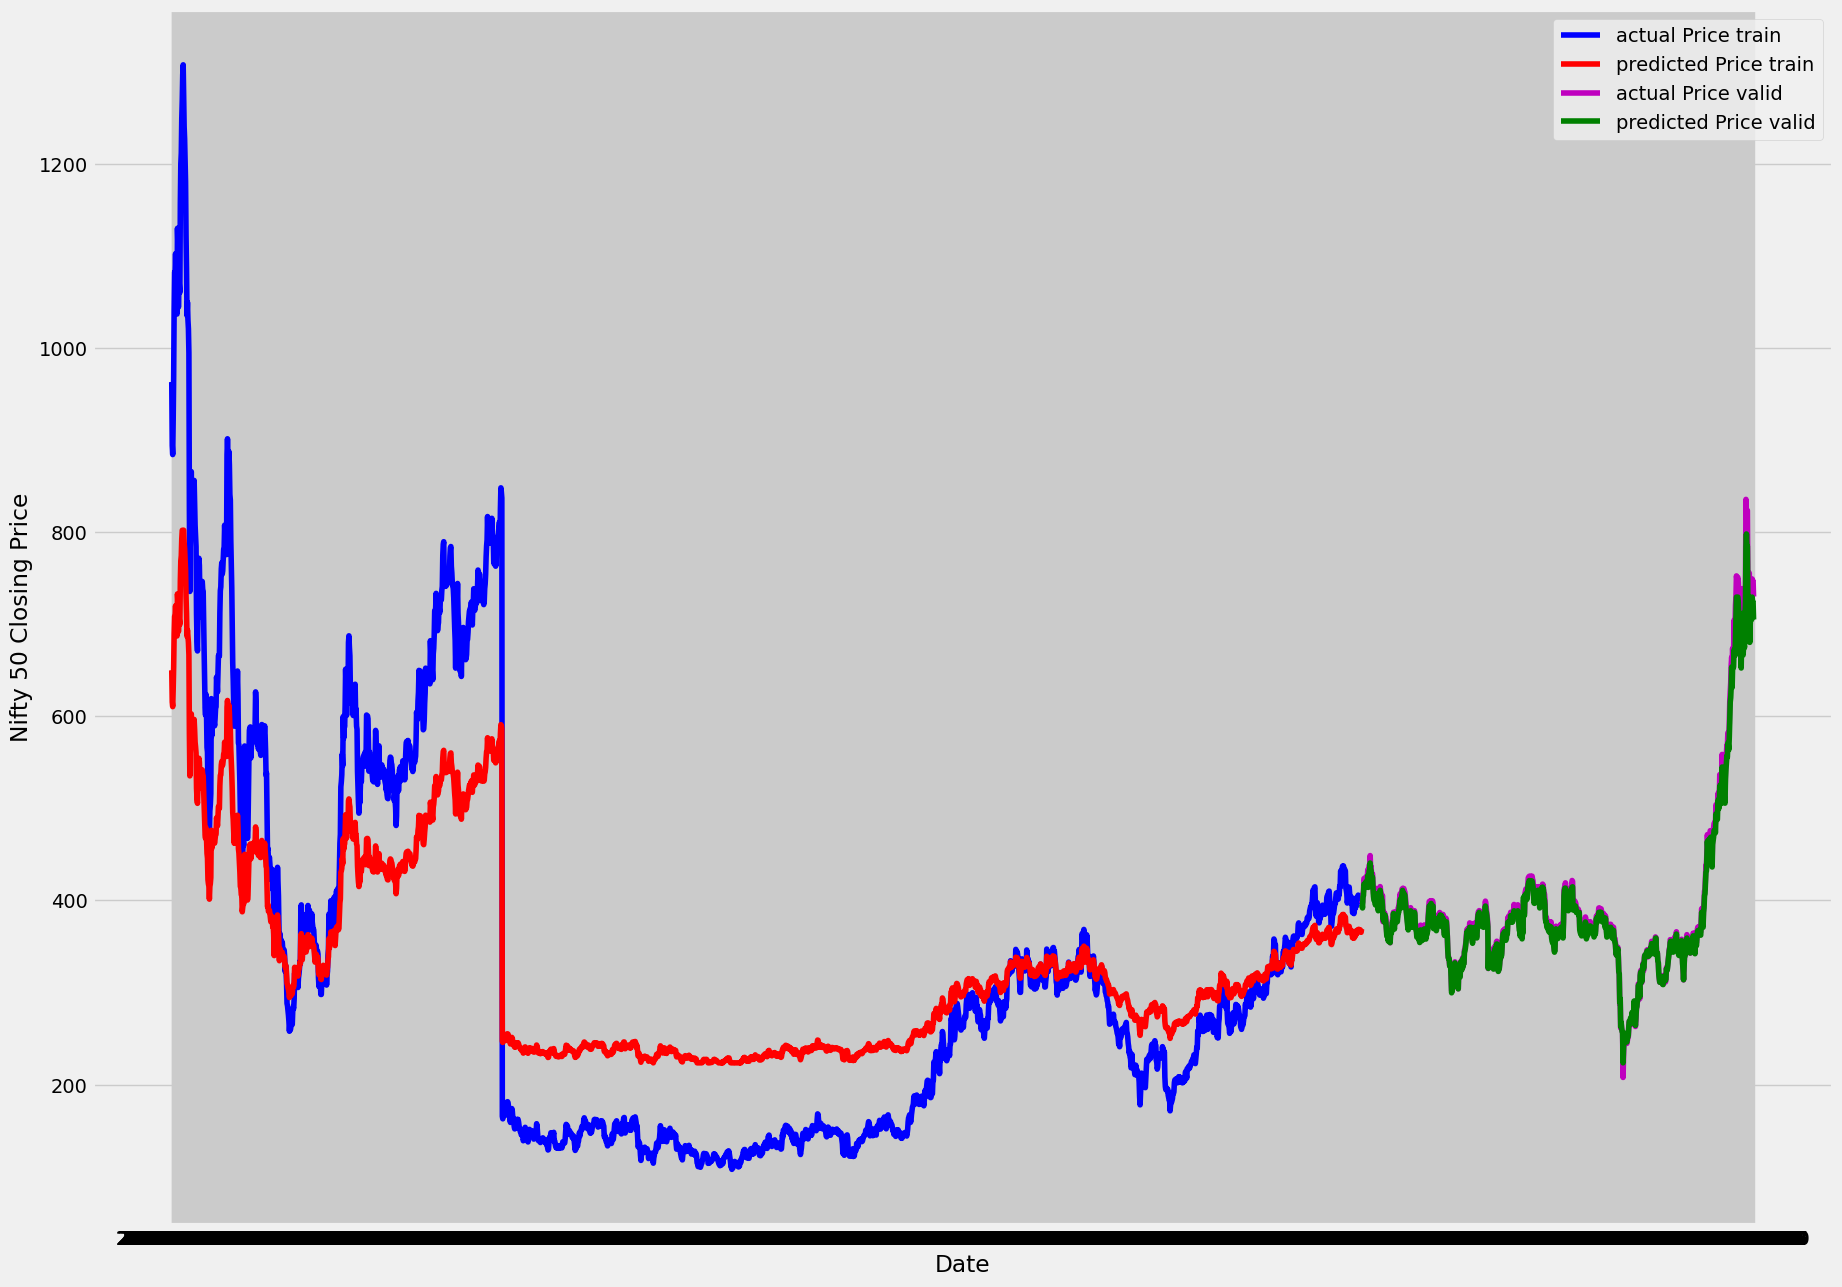

In [71]:
plt.figure(figsize=(20,15))
plt.plot(x_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(x_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(x_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(x_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel("Nifty 50 Closing Price")
plt.legend()
plt.show()